- references
    - https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [1]:
# !pip install ace_tools
# !pip install ACE

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

- PCA
    $$
    \begin{split}
    Cov(X)=\frac1nX^TX\\
    Cov(X)v=\lambda v
    \end{split}
    $$    
    - $X^{m\times p}, Cov(x)^{p\times p}$
    - 不能很好地处理非线性数据；
- tSNE
- UMAP (uniform manifold approximation and projection, 2018)

### PCA

- objective：寻找数据方差最大的方向
    - 为什么协方差矩阵的特征向量（$v$） 代表一个新的坐标轴方向。这些方向是数据方差最大的方向
    - 找到一个方向向量 $v$ ，使得数据投影到这个方向上的方差最大。
        - 将数据矩阵 $X$ 中的每一个样本投影到 $v$ 上，$Z=Xv$
            - $v^Tv=1$（约束），
        - 最大化向量 $Z$ 的方差，由于数据 $X$ 已经中心化，投影后的数据 $Z$ 的均值也为0
            - $Z$ 的方差表示为 $Var(Z)=\frac1nZ^TZ$
        - 最终目标函数为 $v^TCov(X)v$，约束为 $v^Tv=1$
            - 拉格朗日乘子法求得 $ Cov(X) v = \lambda v $
- 主成分之间彼此正交
    - $Cov(X)$ 是对称阵
    - 一个实对称矩阵的不同特征值所对应的特征向量是相互正交的。

In [8]:
# Generate data for three clusters: top-left, top-right, bottom-right
np.random.seed(42)

# Cluster centers
centers = np.array([[0.25, 0.75], [0.75, 0.75], [0.75, 0.25]])
cluster_data = []

# Generate 100 points around each center
for center in centers:
    cluster_data.append(center + 0.05 * np.random.randn(100, 2))

# Concatenate data
data = np.vstack(cluster_data)

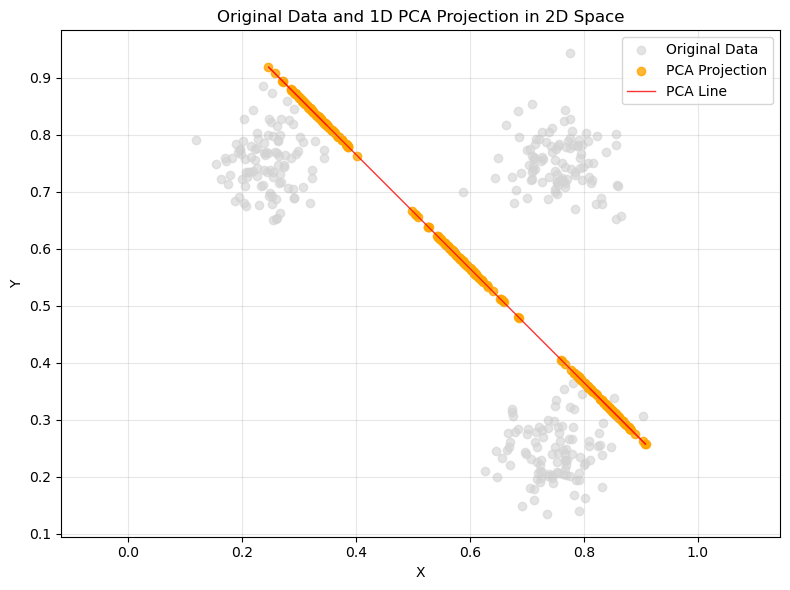

In [11]:
pca_1d = PCA(n_components=1)
data_pca_1d = pca_1d.fit_transform(data)
data_projected = pca_1d.inverse_transform(data_pca_1d)

# Plot original data and the PCA projection line
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.6, label="Original Data", c="lightgray")
plt.scatter(data_projected[:, 0], data_projected[:, 1], alpha=0.8, label="PCA Projection", c="orange")

# Highlight the line formed by the PCA projection
plt.plot(data_projected[:, 0], data_projected[:, 1], c="red", linewidth=1, alpha=0.8, label="PCA Line")

plt.title("Original Data and 1D PCA Projection in 2D Space")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.axis('equal')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()